## K-평균 알고리즘
- 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- 중심점의 이동이 없을 경우에 반복을 멈춤
- 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐

In [1]:
# KMeans 클래스
# sklearn.cluster.KMeans(n_clusters, init(초기 군집 중심점의 좌표, 보통 'k-means++' 방식으로 설정), max_iter)
# 속성: labels_(군집 중심점 레이블), cluster_centers_(군집 중심점 좌표)

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [4]:
# 군집화가 효과적으로 됐는지 확인
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [5]:
# 2차원으로 PCA -> 군집화 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


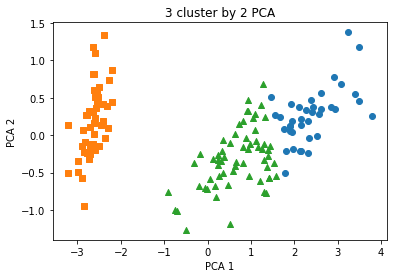

In [9]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s') # 네모
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^') # 세모

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 cluster by 2 PCA')
plt.show()

# 0,2 명확히 분류되지 않음 

In [10]:
# 군집화용 데이터 생성기 -> 군집화 알고리즘 테스트
# make_blobs() / make_classification()
# make_blobs(n_samples(생성할 데이터 총 개수), n_features, centers(int, 군집의 개수; ndarrary, 개별 군집 중심정 좌표)
#            , cluster_std)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# 타깃 y 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [11]:
# df로 변경
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


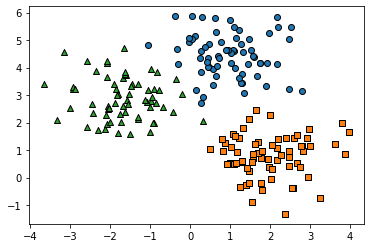

In [12]:
target_list = np.unique(y)

markers=['o', 's', '^', 'P','D','H','x']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

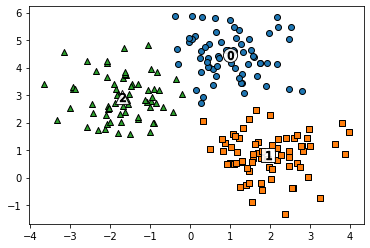

In [14]:
# KMeans 군집화 수행

# X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X) # 군집화
clusterDF['kmeans_label']  = cluster_labels 

centers = kmeans.cluster_centers_ # 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [15]:
clusterDF.groupby('target')['kmeans_label'].value_counts()
# 대부분 잘 매핑
# cluster_std가 작을수록 군집 중심에 데이터가 모여있어

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64

In [16]:
# 군집화 데이터는 대부분 타깃 레이블이 없어
# 군집화의 성능을 평가하는 대표적인 방법 -> 실루엣 분석

## 실루엣 분석
- 실루엣 계수를 기반으로 함
- 실루엣 계수: 개별 데이터의 군집화 지표
- 1에 가까워질수록 근처 군집과 더 멀리 떨어져 있음/ 0에 가까울수록 근처 군집과 가까워짐, -는 아예 다른 군집에 할당
- 1에 가까울수록 좋음/ 개별 군집의 평균값의 편차가 크지 않아야

In [18]:
# sklearn.metrics.silhouette_samples(X, labels) : 실루엣 계수 반환
# sklearn.metrics.silhouette_score(X, labels) : 전체 데이터의 실루엣 계수 값 평균해 반환

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

# 실루엣 계수값
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)

irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [19]:
# 군집 별 평균 실루엣 계수 값
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

## 평균 이동
- 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동
- 데이터 분포를 찾기 위해 pdf 이용
- pdf를 찾기위해 KDE 이용
#### KDE : 커널 함수를 통해 어떤 변수의 pdf를 추정하는 대표적인 방법
- (bandwidth)대역폭이 클수록 평활화된 KDE로 더 적은 수의 군집 중심점을 가짐

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5]


In [24]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print( np.unique(cluster_labels))

[0 1 2]


In [25]:
# 최적의 대역폭
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print(round(bandwidth,3))

1.816


In [27]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

best = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best)
cluster_labels = meanshift.fit_predict(X)
print(np.unique(cluster_labels)) 

[0 1 2]


In [29]:
clusterDF['meanshift_label'] = cluster_labels
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


## GMM
- 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- EM 알고리즘 활용
- 데이터가 분포된 방향에 따라 정확하게 군집화됨 (KMeans는 원형으로 군집화)

In [31]:
from sklearn.mixture import GaussianMixture
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

In [32]:
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64
target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


In [33]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])

kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = kmeans_label

## DBSCAN
- 밀도 기반 군집화의 대표 알고리즘
- 특정 공간내에 데이터 밀도 차이를 기반한 알고리즘

In [34]:
# 입실론 : 주변 영역
# 최소 데이터 개수 : 주변 영역에 포함되는 최소 데이터 개수